# Image enhancement by averaging

This brief notebook demonstrates the concept of 'statiscally noisy, averaged picture' or SNAPshot first used in the 70s for enhancing particles in cryo-EM.

This method is based around the principle that noise is random while signal is not. Therefore if many images showing the same thing with different noise profiles are averaged together, the noise will be removed by averaging, but the signal will be enhanced.



In this notebook, an image is loaded, and corrupted by adding gaussian and salt & pepper noise. 

This process is repeated n times to produce n images with the same underlying signal but different noise profiles. 

These images are then averaged (technically added together and then scaled between 0-255) and the resulting images are plotted for three different values of n.

## Import dependancies

In [10]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise
plt.gray()


<Figure size 432x288 with 0 Axes>

## Load image

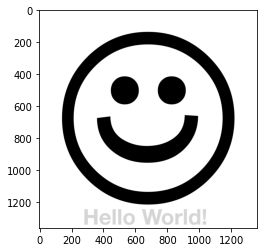

In [82]:
im = cv2.imread('Original_image_2.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im)

## Add noise

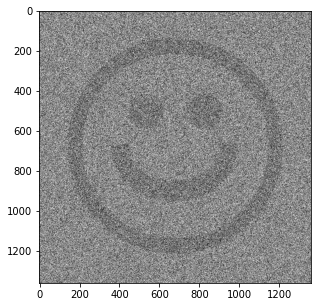

In [88]:
Gnoise_im = random_noise(im, mode='gaussian',var=0.9999)
Gnoise_im = np.array(255*Gnoise_im, dtype = 'uint8')

spnoise = random_noise(Gnoise_im, mode='s&p', amount=0.8)
#spnoise = random_noise(Gnoise_im, mode='s&p', amount=0.8)

plt.figure(figsize=(5,5))
plt.imshow(spnoise)
plt.show()

## Loop n times 

In [75]:
n = 500
noisy_frames = []
for x in range(n):
    im = cv2.imread('Original_image_3.png')
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    Gnoise_im = random_noise(im, mode='gaussian',var=0.99)
    Gnoise_im = np.array(255*Gnoise_im, dtype = 'uint8')
    Gnoise_cropped = Gnoise_im[172:352, 172:352]
    
    spnoise = random_noise(Gnoise_im, mode='s&p', amount=0.75)
    spnoise = np.array(255*spnoise, dtype = 'uint8')
    noisy_frames.append(spnoise)

noisy_frames = np.array(noisy_frames)

## Define function to scale image between 0 and 255 (convert to 8bit)

In [77]:
def convert8bit(noisy_frames):
    frames8bit = (noisy_frames - noisy_frames.min()) * (
                1 / (noisy_frames.max() - noisy_frames.min()) * 255
            )
    return frames8bit

## Average noisy images

In [97]:
frame1 = convert8bit(noisy_frames[0])
fiveav  = convert8bit(np.sum(noisy_frames[:5], axis=0))
fiftyav  = convert8bit(np.sum(noisy_frames[:50], axis=0))
fivehundredav  = convert8bit(np.sum(noisy_frames[:500], axis=0))

In [95]:
print(frame1)

[232.53832903 205.92305484 190.48980764 ... 196.76658053 213.10278496
   0.        ]


## Plot results

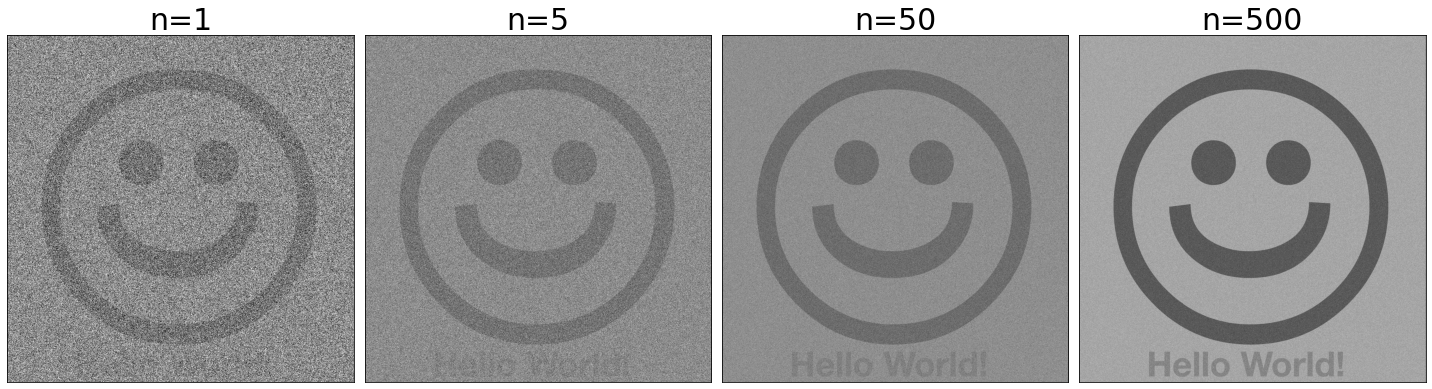

In [107]:
fig, ax = plt.subplots(1,4, figsize=(20,10))

ax[0].imshow(frame1)
ax[0].set_title('n=1', fontsize=30)
ax[1].imshow(fiveav)
ax[1].set_title('n=5', fontsize=30)
ax[2].imshow(fiftyav)
ax[2].set_title('n=50', fontsize=30)
ax[3].imshow(fivehundredav)
ax[3].set_title('n=500', fontsize=30)

for a in ax:
    a.set_xticks([])
    a.set_yticks([])
fig.tight_layout()

plt.show()


## Write output files

In [81]:
for x in range(10):
    frame = convert8bit(noisy_frames[x])
    cv2.imwrite(f'Noisy_im_{x}.png',frame)


cv2.imwrite('5_im_average.png', fiveav)
cv2.imwrite('50_im_average.png', fiftyav)
cv2.imwrite('500_im_average.png', fivehundredav)

True